In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width = None

def autolabel(rects):
    for rect in rects:
        height = rect.get_height() # here height means the hieght of a rectangle 
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom') # this is used for text in the bars

In [2]:
df = pd.read_csv('match_stats_venue.csv')
df.head()

,Match_Id,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,335987,1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,SC Ganguly,BB McCullum,P Kumar,legbyes,1.0,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1,335987,1,2,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
2,335987,1,3,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
3,335987,1,4,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
4,335987,1,5,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium


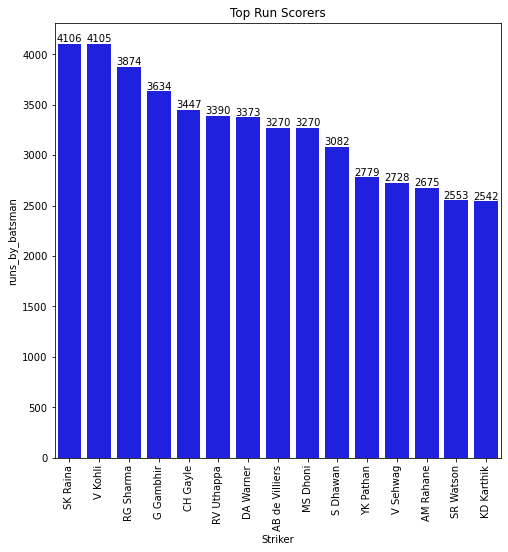

In [27]:
Batsman_score = df.groupby('Striker')["runs_by_batsman"].agg(
    sum).reset_index().sort_values(by="runs_by_batsman",
                                   ascending=False).reset_index(drop=True)
Top_15_batsmans = Batsman_score.iloc[:15, :]
Top_15_batsmans
#labels = np.array(Top_15_batsmans['Striker'])
#ind = np.arange(len(labels)) # making them as indexes
plt.figure(figsize=(8, 8))
g = sns.barplot(x=Top_15_batsmans['Striker'],
                y=Top_15_batsmans['runs_by_batsman'],
                color='blue')
g.bar_label(container=g.containers[0])
#plt.xaxis.label.set_color('white')
#plt.yaxis.label.set_color('white')
plt.title('Top Run Scorers')
plt.xticks(rotation=90)
plt.show()

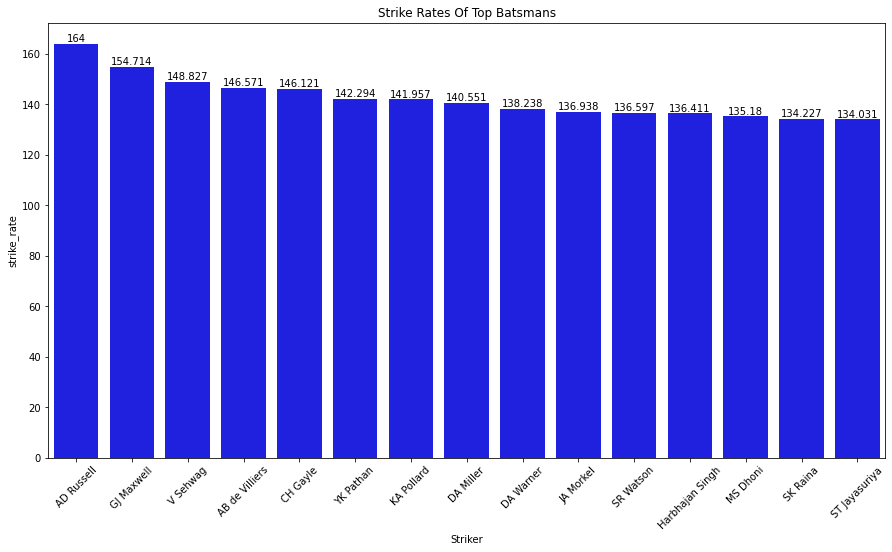

In [5]:
Batsman_strike_rate = pd.merge(Batsman_score,
                               Batsman_ball_faced,
                               on='Striker',
                               how='outer')
Batsman_strike_rate = Batsman_strike_rate[
    Batsman_strike_rate['runs_by_batsman'] >= 500]
Batsman_strike_rate['strike_rate'] = (Batsman_strike_rate['runs_by_batsman'] /
                                      Batsman_strike_rate['Ball_Id']) * 100
Batsman_strike_rate = Batsman_strike_rate[['Striker', 'strike_rate']]
Batsman_strike_rate = Batsman_strike_rate.sort_values(
    by='strike_rate', ascending=False).reset_index(drop=True)
Batsman_strike_rate = Batsman_strike_rate.iloc[:15, :]
plt.figure(figsize=(15, 8))
g = sns.barplot(x=Batsman_strike_rate['Striker'],
                y=Batsman_strike_rate['strike_rate'],
                color='blue')
g.bar_label(container=g.containers[0])
plt.xticks(rotation=45)
plt.title('Strike Rates Of Top Batsmans')
plt.show()

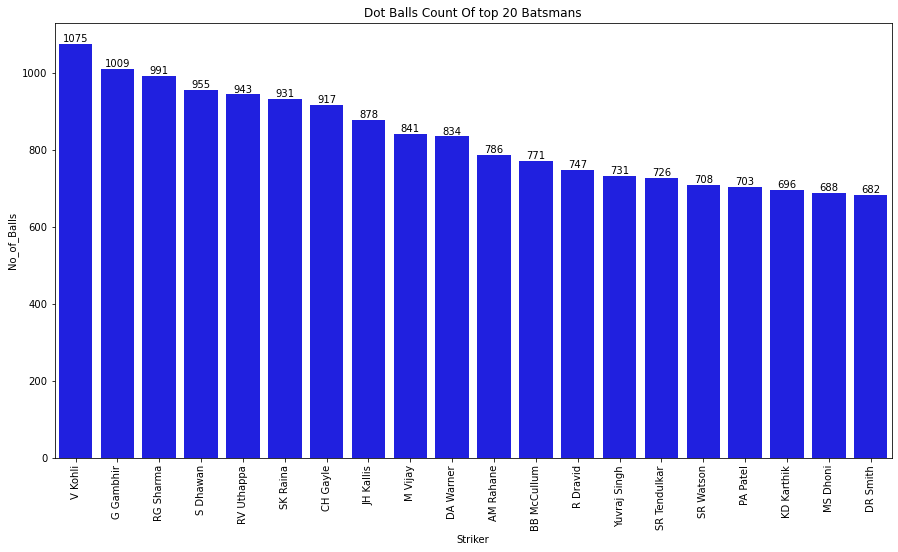

In [6]:
df['Extra_Runs'] = df['Extra_Runs'].fillna(0)
Batsman_dotballs = df[df["Extra_Runs"] == 0].groupby([
    'Striker'
])["runs_by_batsman"].agg(lambda x: (x == 0).sum()).reset_index().sort_values(
    by="runs_by_batsman", ascending=False).reset_index(drop=True)
Batsman_dotballs.columns = ["Striker", "No_of_Balls"]
Batsman_dotballs_top = Batsman_dotballs.iloc[:20, :]
plt.figure(figsize=(15, 8))
g = sns.barplot(x=Batsman_dotballs_top['Striker'],
                y=Batsman_dotballs_top['No_of_Balls'],
                color='blue')
g.bar_label(container=g.containers[0])
plt.title('Dot Balls Count Of top 20 Batsmans')
plt.xticks(rotation=90)
plt.show()

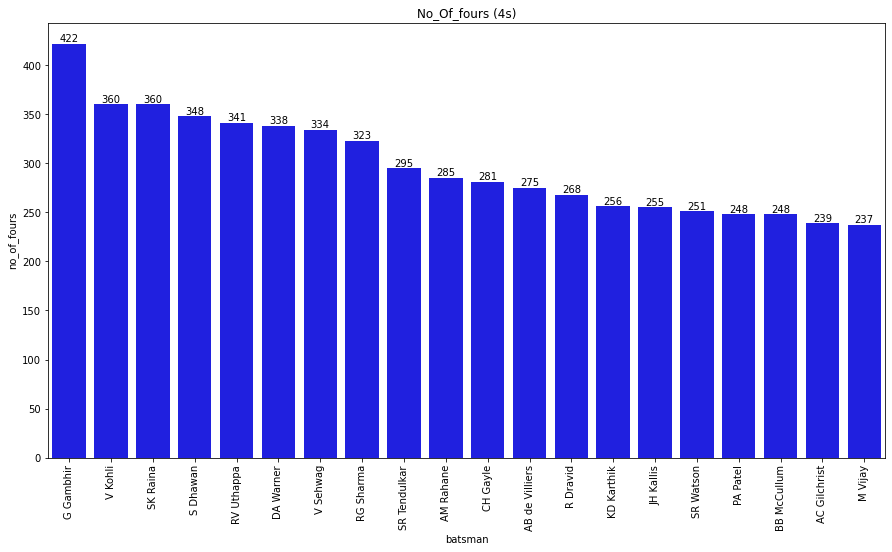

In [7]:
Batsman_fours = df.groupby([
    'Striker'
])["runs_by_batsman"].agg(lambda x: (x == 4).sum()).reset_index().sort_values(
    by="runs_by_batsman", ascending=False).reset_index(drop=True)
Batsman_fours.columns = ['batsman', 'no_of_fours']
Batsman_fours = Batsman_fours.head(20)
plt.figure(figsize=(15, 8))
g = sns.barplot(x=Batsman_fours['batsman'],
                y=Batsman_fours['no_of_fours'],
                color='blue')
g.bar_label(container=g.containers[0])
plt.title('No_Of_fours (4s)')
plt.xticks(rotation=90)
plt.show()

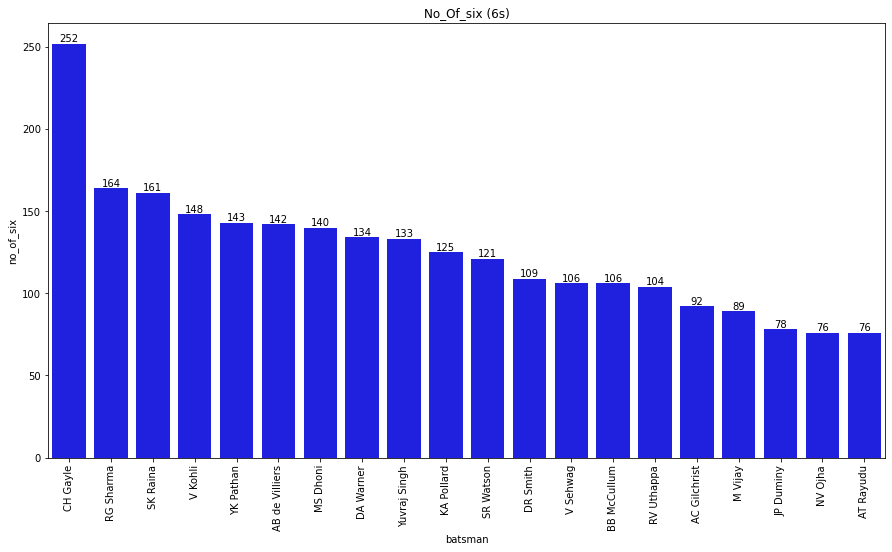

In [8]:
Batsman_six = df.groupby([
    'Striker'
])["runs_by_batsman"].agg(lambda x: (x == 6).sum()).reset_index().sort_values(
    by="runs_by_batsman", ascending=False).reset_index(drop=True)
Batsman_six.columns = ['batsman', 'no_of_six']
Batsman_six = Batsman_six.head(20)
plt.figure(figsize=(15, 8))
g = sns.barplot(x=Batsman_six['batsman'],
                y=Batsman_six['no_of_six'],
                color='blue')
g.bar_label(container=g.containers[0])
plt.title('No_Of_six (6s)')
plt.xticks(rotation=90)
plt.show()

In [10]:
Batsman_Score_by_Match = df[["Match_Id", "Striker", "runs_by_batsman"]]
Batsman_Score_by_Match = Batsman_Score_by_Match.groupby(
    ["Match_Id", "Striker"]).sum()
Batsman_with_centuries = Batsman_Score_by_Match[
    Batsman_Score_by_Match["runs_by_batsman"] >= 100].reset_index()
Batsman_with_centuries = Batsman_with_centuries.groupby(
    "Striker")["Match_Id"].count().reset_index().sort_values(
        by="Match_Id", ascending=False).reset_index(drop=True)
Batsman_with_centuries.columns = ["batsman", "No_of_centuries"]
Batsman_with_centuries = Batsman_with_centuries

In [11]:
Striker_on_last_ball = df[[
    "Match_Id", "Striker"
]][(df["Over_Id"] == 20) & (df["Ball_Id"] == 6)]  #last ball of match
Striker_on_last_ball = Striker_on_last_ball.groupby(
    "Striker")["Match_Id"].count().reset_index().sort_values(
        by="Match_Id", ascending=False).reset_index(drop=True)
Striker_on_last_ball.columns = ["batsman", "No_of_Matches"]
Non_Striker_on_last_ball = df[["Match_Id", "Non_Striker"
                               ]][(df["Over_Id"] == 20) & (df["Ball_Id"] == 6)]
Non_Striker_on_last_ball = Non_Striker_on_last_ball.groupby(
    "Non_Striker")["Match_Id"].count().reset_index().sort_values(
        by="Match_Id", ascending=False).reset_index(drop=True)
# same for Non_striker
Non_Striker_on_last_ball.columns = ["batsman", "No_of_Matches"]
Players_on_last_ball = pd.concat(
    [Striker_on_last_ball, Non_Striker_on_last_ball], ignore_index=True)
Players_on_last_ball.head(2)

,batsman,No_of_Matches
0,MS Dhoni,22
1,JP Duminy,14


In [12]:
player_dismissed_on_last_ball = df[["Match_Id",
                                    "Player_Out"]][(df["Over_Id"] == 20)
                                                   & (df["Ball_Id"] == 6)]
player_dismissed_on_last_ball = player_dismissed_on_last_ball.groupby(
    "Player_Out")["Match_Id"].count().reset_index().sort_values(
        by="Match_Id", ascending=False).reset_index(drop=True)
player_dismissed_on_last_ball.columns = ["batsman", "No_of_Matches"]
player_dismissed_on_last_ball.head(2)
# this gives the no of instances when a player was dismissed on last ball

,batsman,No_of_Matches
0,S Badrinath,4
1,RP Singh,4


In [13]:
Batsman_Not_out = pd.merge(Players_on_last_ball,
                           player_dismissed_on_last_ball,
                           on="batsman",
                           how="outer")
Batsman_Not_out = Batsman_Not_out.fillna(0)
Batsman_Not_out["Not_out"] = Batsman_Not_out[
    "No_of_Matches_x"] - Batsman_Not_out["No_of_Matches_y"]
Batsman_Not_out.drop("No_of_Matches_x", axis=1, inplace=True)

Batsman_Not_out.drop("No_of_Matches_y", axis=1, inplace=True)
Batsman_Not_out = Batsman_Not_out.sort_values(by="Not_out", ascending=False)
Batsman_Not_out = Batsman_Not_out.head(15)

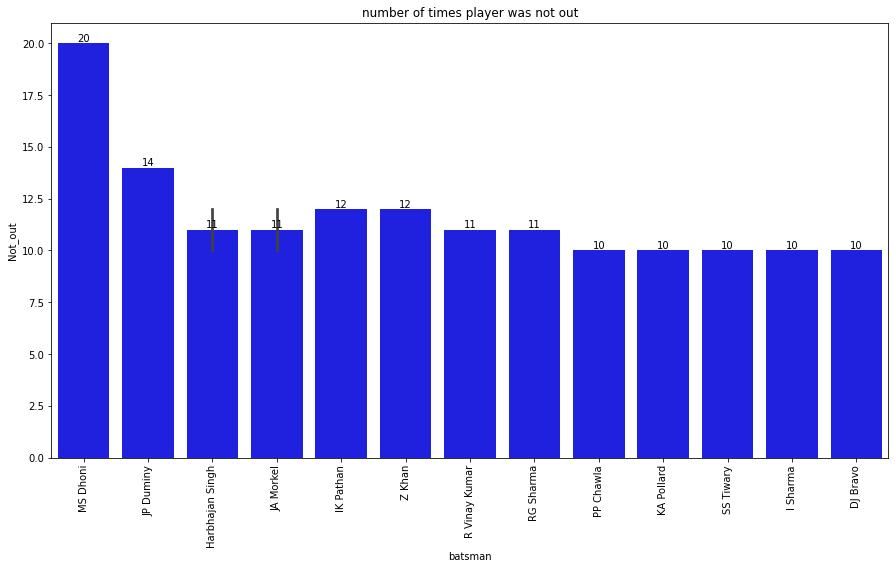

In [14]:
plt.figure(figsize=(15, 8))
g = sns.barplot(x=Batsman_Not_out['batsman'],
                y=Batsman_Not_out['Not_out'],
                color='blue')
g.bar_label(container=g.containers[0])
plt.title('number of times player was not out')
plt.xticks(rotation=90)
plt.show()

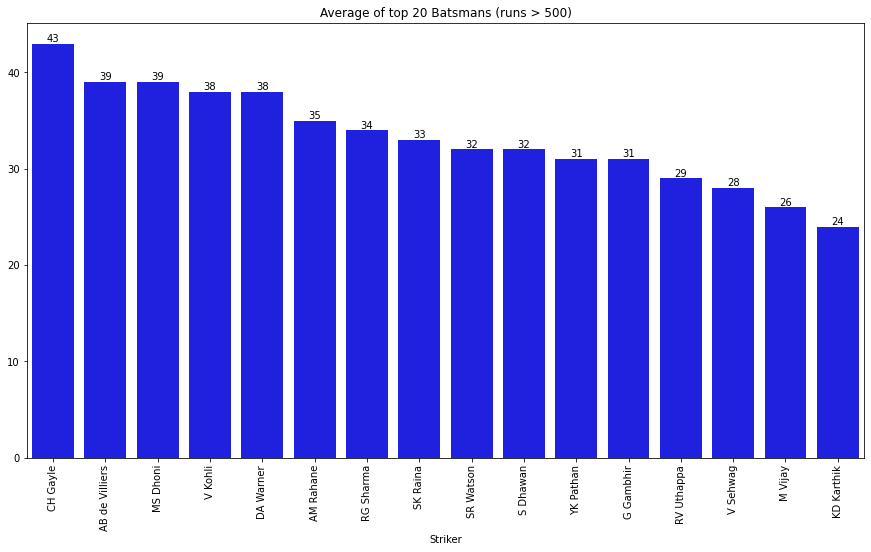

In [29]:
No_Matches_player_dismissed = df[["Match_Id", "Player_Out"]]
No_Matches_player_dismissed = No_Matches_player_dismissed.groupby(
    "Player_Out")["Match_Id"].count().reset_index().sort_values(
        by="Match_Id", ascending=False).reset_index(drop=True)
No_Matches_player_dismissed.columns = ["Striker", "No_of Matches"]
No_Matches_player_dismissed.head(2)
Batsman_Average = pd.merge(Batsman_score,
                           No_Matches_player_dismissed,
                           on="Striker")
#merging the score and match played by batsman
Batsman_Average = Batsman_Average[Batsman_Average["runs_by_batsman"] >= 2500]
# taking Average for those player for having more than 500 runs under thier belt
Batsman_Average["Average"] = (Batsman_Average["runs_by_batsman"] /
                              Batsman_Average["No_of Matches"])
Batsman_Average = Batsman_Average.sort_values(
    by="Average", ascending=False).reset_index(drop=True)

Batsman_Average = Batsman_Average.iloc[:20, :]
plt.figure(figsize=(15, 8))
g = sns.barplot(x=Batsman_Average['Striker'],
                y=np.round(np.array(Batsman_Average['Average'])),
                color='blue')
g.bar_label(container=g.containers[0])
plt.title('Average of top 20 Batsmans (runs > 500)')
plt.xticks(rotation=90)
plt.show()

# Bowler Analysis

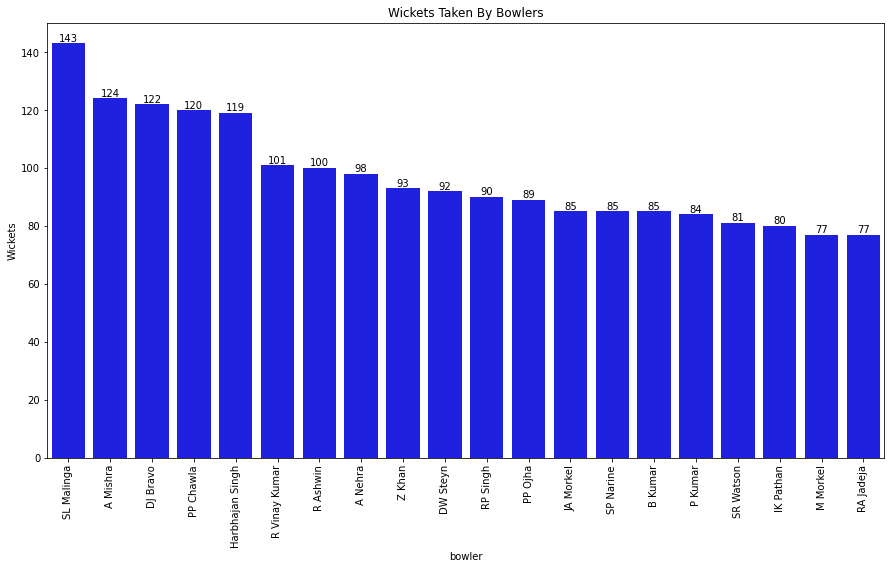

In [16]:
Bowler_wicket = df[df["Kind_Out"] != "run out"]
Bowler_wicket = Bowler_wicket[["bowler", "Player_Out"]]
Bowler_wicket = Bowler_wicket.dropna()
Bowler_wicket = Bowler_wicket.groupby(
    "bowler")["Player_Out"].count().reset_index().sort_values(
        by="Player_Out", ascending=False).reset_index(drop=True)
Bowler_wicket.columns = ["bowler", "Wickets"]
Bowler_wicket_top = Bowler_wicket.iloc[:20, :]
plt.figure(figsize=(15, 8))
g = sns.barplot(x=Bowler_wicket_top['bowler'],
                y=Bowler_wicket_top['Wickets'],
                color='blue')
g.bar_label(container=g.containers[0])
plt.title('Wickets Taken By Bowlers')
plt.xticks(rotation=90)
plt.show()

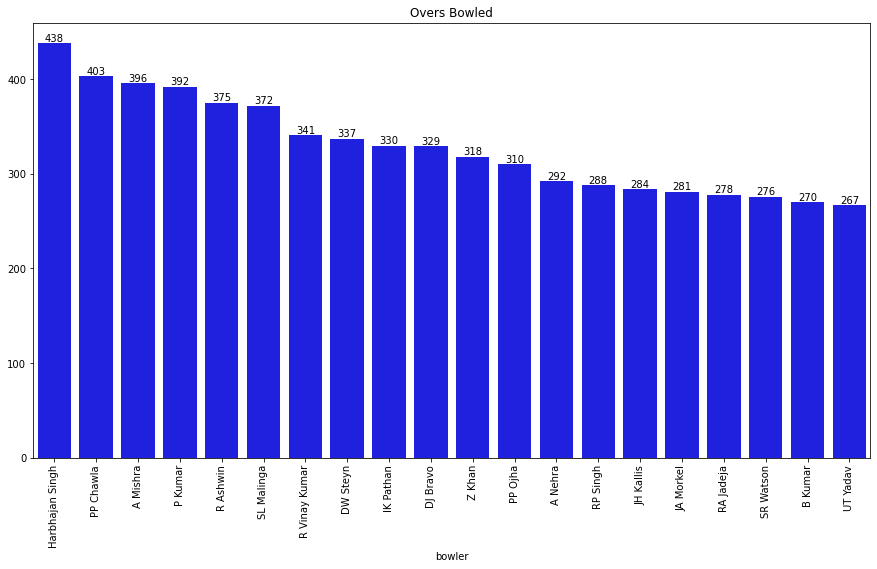

In [17]:
Bowler_over = df[df["Extra_Runs"] == 0][[
    "Ball_Id", "bowler"
]]  # here extra balls I am not considering include in over
Bowler_over = Bowler_over.groupby(
    "bowler")["Ball_Id"].count().reset_index().sort_values(
        by="Ball_Id", ascending=False).reset_index(drop=True)
Bowler_over["No_of_Overs"] = (Bowler_over["Ball_Id"] / 6)
Bowler_over_top = Bowler_over.iloc[:20, :]
plt.figure(figsize=(15, 8))
g = sns.barplot(x=Bowler_over_top['bowler'],
                y=np.round(np.array(Bowler_over_top['No_of_Overs'])),
                color='blue')
g.bar_label(container=g.containers[0])
plt.title('Overs Bowled')
plt.xticks(rotation=90)
plt.show()

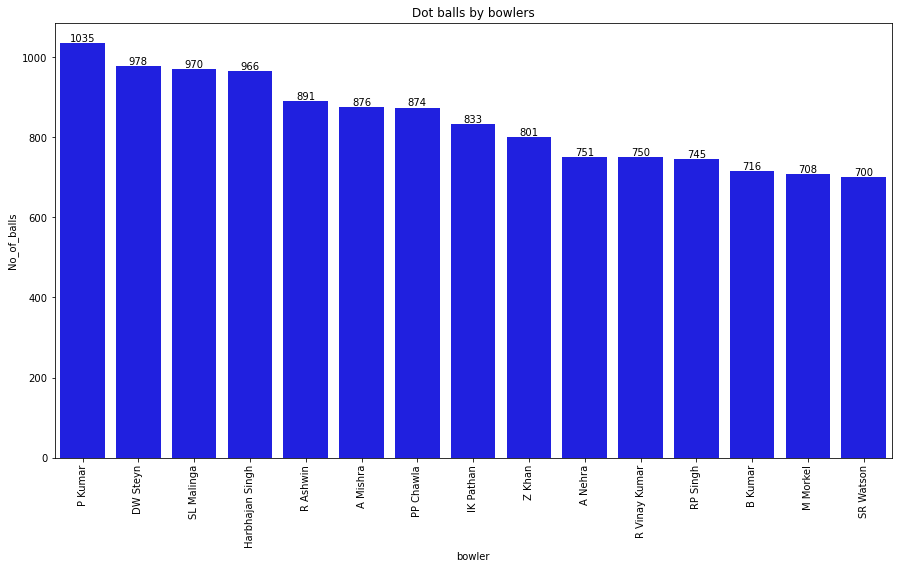

In [18]:
df['total_runs'] = df['Extra_Runs'] + df['runs_by_batsman']
Bowler_dotball = df.groupby("bowler")["total_runs"].agg(
    lambda x: (x == 0).sum()).reset_index().sort_values(
        by="total_runs", ascending=False).reset_index(drop=True)
Bowler_dotball.columns = ["bowler", "No_of_balls"]
Bowler_dotball_Top = Bowler_dotball.iloc[:15, :]
plt.figure(figsize=(15, 8))
g = sns.barplot(x=Bowler_dotball_Top['bowler'],
                y=Bowler_dotball_Top['No_of_balls'],
                color='blue')
g.bar_label(container=g.containers[0])
plt.title('Dot balls by bowlers')
plt.xticks(rotation=90)
plt.show()

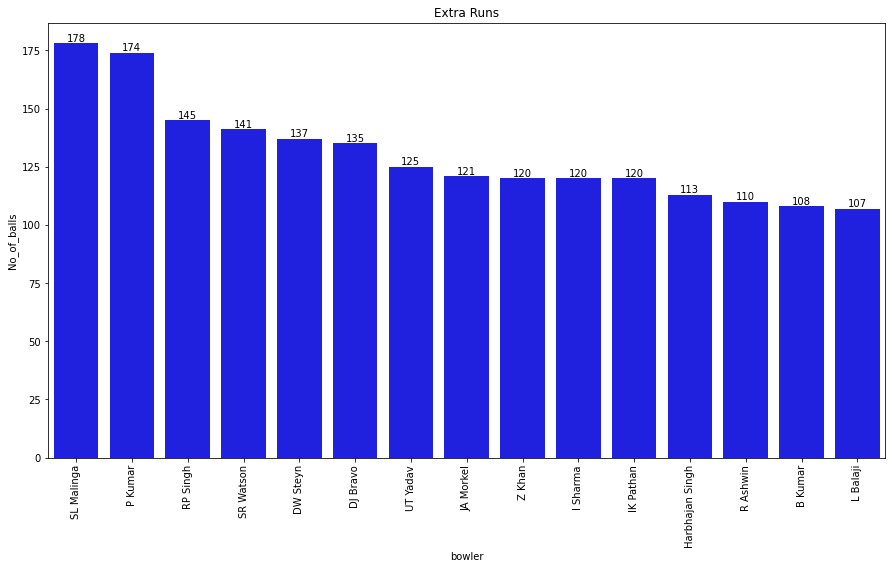

In [30]:
Bowler_extras = df.groupby("bowler")["Extra_Runs"].agg(
    lambda x: (x > 0).sum()).reset_index().sort_values(
        by="Extra_Runs", ascending=False).reset_index(drop=True)
Bowler_extras.columns = ["bowler", "No_of_balls"]
Bowler_extras_Top = Bowler_extras.iloc[:15, :]
plt.figure(figsize=(15, 8))
g = sns.barplot(x=Bowler_extras_Top['bowler'],
                y=Bowler_extras_Top['No_of_balls'],
                color='blue')
g.bar_label(container=g.containers[0])
plt.title('Extra Runs')
plt.xticks(rotation=90)
plt.show()

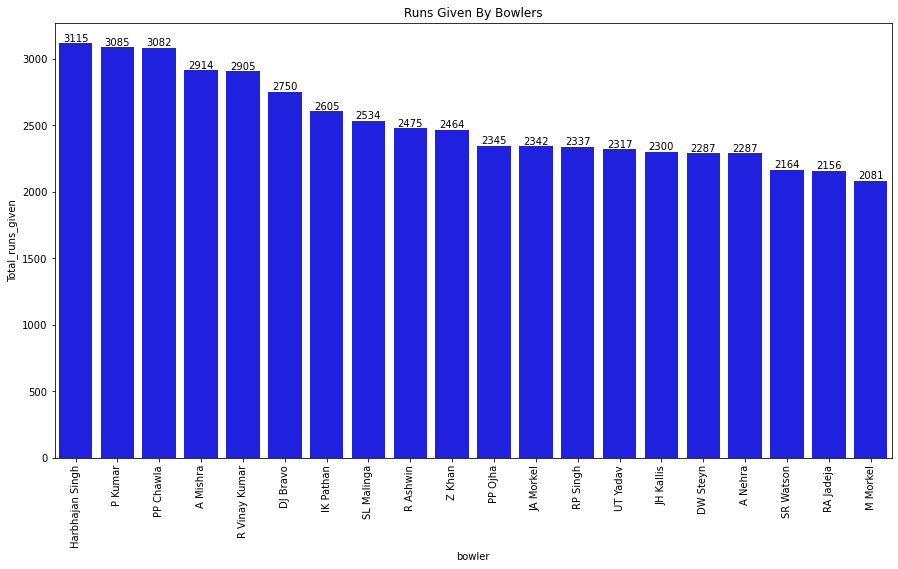

In [35]:
Bowler_Runs = df.groupby(
    "bowler")["total_runs"].sum().reset_index().sort_values(
        by="total_runs", ascending=False).reset_index(drop=True)
Bowler_Runs.columns = ["bowler", "Total_runs_given"]
Bowler_Runs_Top = Bowler_Runs.iloc[:20, :]
plt.figure(figsize=(15, 8))
g = sns.barplot(x=Bowler_Runs_Top['bowler'],
                y=Bowler_Runs_Top['Total_runs_given'],
                color='blue')
g.bar_label(container=g.containers[0])
plt.title('Runs Given By Bowlers')
plt.xticks(rotation=90)
plt.show()

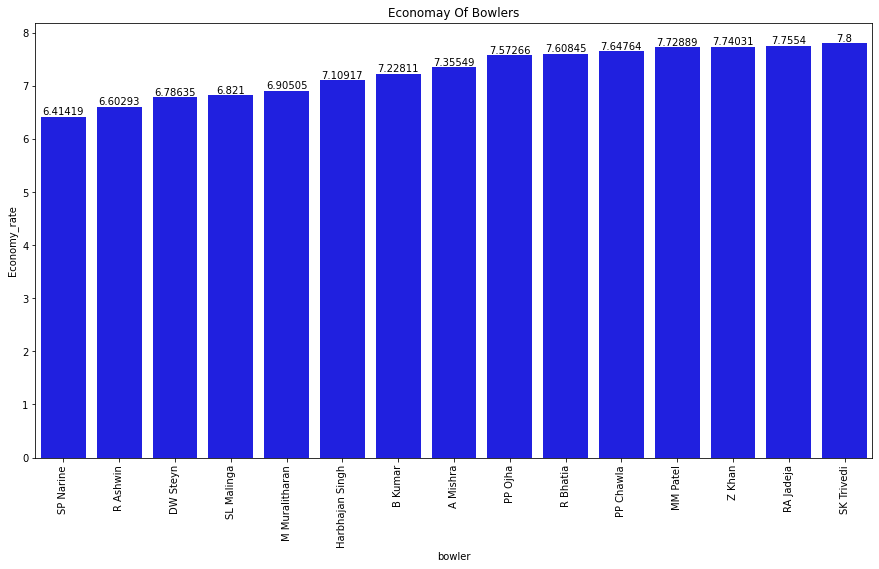

In [33]:
Bowler_economy= pd.merge(Bowler_Runs,Bowler_over,on="bowler")
Bowler_economy=Bowler_economy[Bowler_economy["No_of_Overs"]>200] # taking only bowler with minimum 50 ov
Bowler_economy["Economy_rate"]=Bowler_economy["Total_runs_given"]/Bowler_economy["No_of_Overs"]
Bowler_economy=Bowler_economy.sort_values(by="Economy_rate").reset_index(drop=True)
Bowler_economy_top = Bowler_economy.iloc[:15,:]
plt.figure(figsize=(15,8))
g=sns.barplot(x=Bowler_economy_top['bowler'],y =Bowler_economy_top['Economy_rate'] ,color='blue')
g.bar_label(container=g.containers[0])
plt.title('Economay Of Bowlers')
plt.xticks(rotation=90)
plt.show()

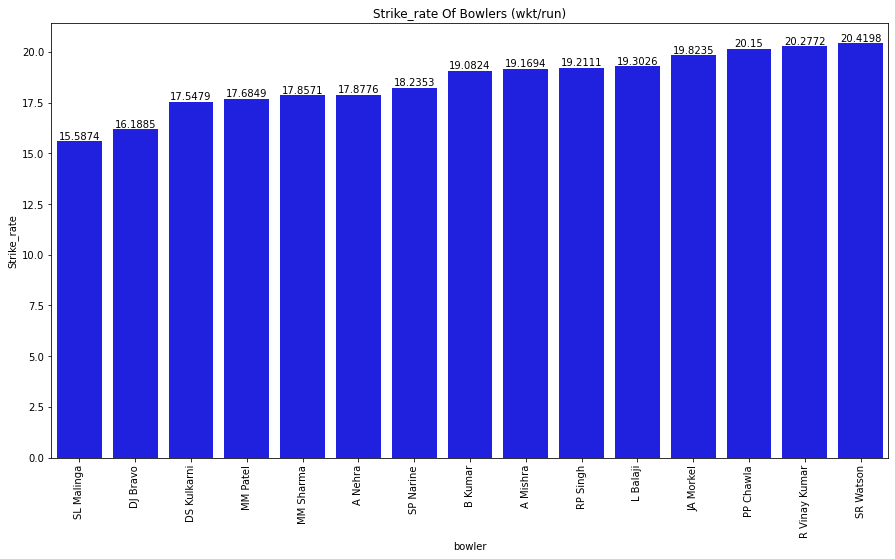

In [22]:
Bowler_Strike_rate = pd.merge(Bowler_over, Bowler_wicket, on="bowler")
Bowler_Strike_rate = Bowler_Strike_rate[
    Bowler_Strike_rate["No_of_Overs"] >=
    200]  # taking only bowler with minimum 50 overs
Bowler_Strike_rate["Strike_rate"] = Bowler_Strike_rate[
    "Ball_Id"] / Bowler_Strike_rate["Wickets"]
Bowler_Strike_rate = Bowler_Strike_rate.sort_values(
    by="Strike_rate").reset_index(drop=True)
Bowler_Strike_rate_top = Bowler_Strike_rate.iloc[:15, :]
plt.figure(figsize=(15, 8))
g = sns.barplot(x=Bowler_Strike_rate_top['bowler'],
                y=Bowler_Strike_rate_top['Strike_rate'],
                color='blue')
g.bar_label(container=g.containers[0])
plt.title('Strike_rate Of Bowlers (wkt/run)')
plt.xticks(rotation=90)
plt.show()

1. Strike Rate of a bowler =The average number of balls bowled per wicket taken
2. In case of bowler a less strike rate will be better

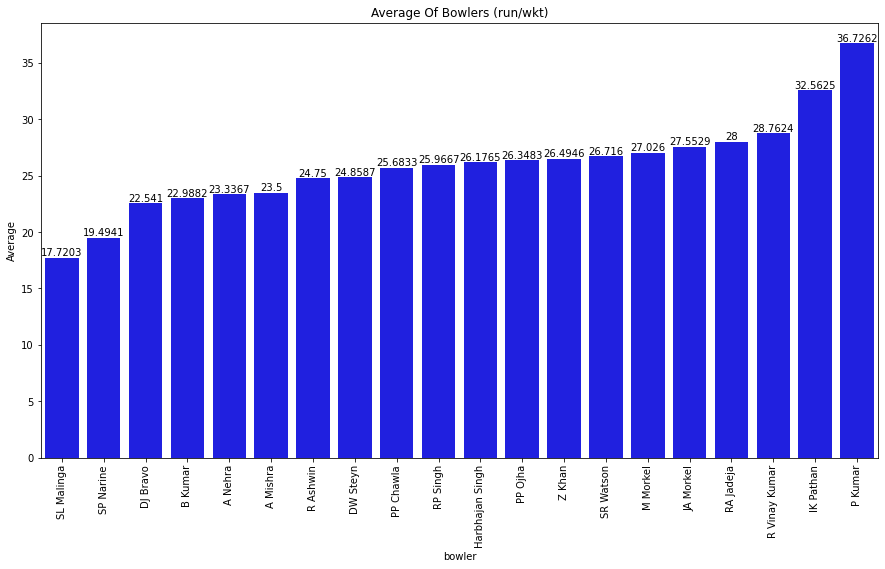

In [23]:
Bowler_Average = pd.merge(Bowler_Runs, Bowler_wicket, on="bowler")
Bowler_Average = Bowler_Average[
    Bowler_Average["Wickets"] >=
    77]  # taking only bowler with minimum 20 wickets
Bowler_Average[
    "Average"] = Bowler_Average["Total_runs_given"] / Bowler_Average["Wickets"]
Bowler_Average = Bowler_Average.sort_values(by="Average").reset_index(
    drop=True)
Bowler_Average_top = Bowler_Average.iloc[:20, :]
plt.figure(figsize=(15, 8))
g = sns.barplot(x=Bowler_Average_top['bowler'],
                y=Bowler_Average_top['Average'],
                color='blue')
g.bar_label(container=g.containers[0])
plt.title('Average Of Bowlers (run/wkt)')
plt.xticks(rotation=90)
plt.show()

1. Now calculate average of bowler
2. Bowling_Average=The average number of runs conceded per wicket

# Wicket Keeper Analysis

In [24]:
Wicket_Keepers = df[df["Kind_Out"] == "stumped"][["Fielders"]]
Wicket_Keepers = Wicket_Keepers.drop_duplicates().reset_index(drop=True)
# number of stumped by wkt
Wicket_keeper_data = pd.merge(df, Wicket_Keepers, on="Fielders")
Wicket_keeper_Stumps = Wicket_keeper_data.groupby("Fielders")["Kind_Out"].agg(
    lambda x: (x == "stumped").sum()).reset_index().sort_values(
        by="Kind_Out", ascending=False).reset_index(drop=True)
Wicket_keeper_Stumps.columns = ["Wicket_keeper", "Stumps"]
Wicket_keeper_Stumps

,Wicket_keeper,Stumps
0,MS Dhoni,27
1,RV Uthappa,26
2,KD Karthik,26
3,AC Gilchrist,16
4,WP Saha,15
5,PA Patel,12
6,NV Ojha,10
7,KC Sangakkara,9
8,AB de Villiers,7
9,SP Goswami,7


# Fielder Analysis

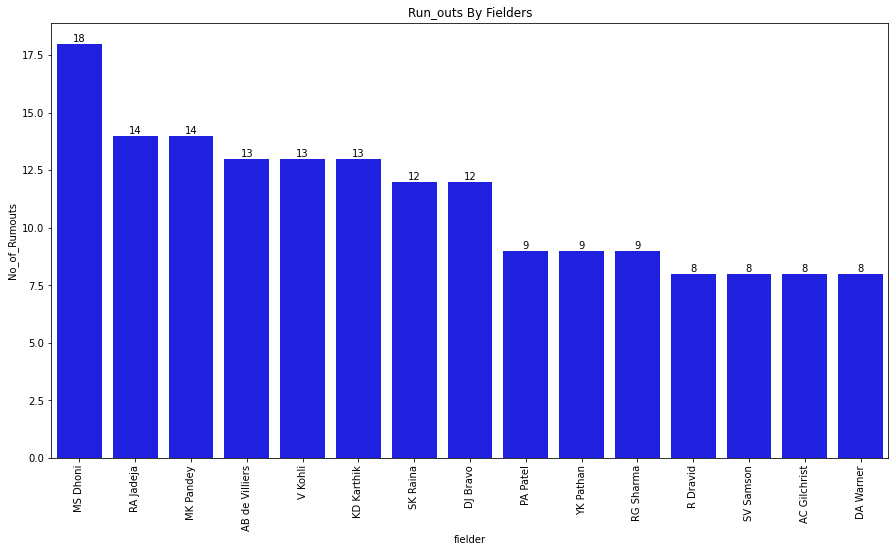

In [25]:
Fielder_data = df[[
    "Kind_Out", "Fielders"
]].dropna()  # bowled data will also be droped because  no fielder involve
Fielder_Runout = Fielder_data.groupby("Fielders")["Kind_Out"].agg(
    lambda x: (x == "run out").sum()).reset_index().sort_values(
        by="Kind_Out", ascending=False).reset_index(drop=True)
Fielder_Runout_Top = Fielder_Runout.iloc[:15, :]
Fielder_Runout_Top.columns = ["fielder", "No_of_Rumouts"]
plt.figure(figsize=(15, 8))
g = sns.barplot(x=Fielder_Runout_Top['fielder'],
                y=Fielder_Runout_Top['No_of_Rumouts'],
                color='blue')
g.bar_label(container=g.containers[0])
plt.title('Run_outs By Fielders')
plt.xticks(rotation=90)
plt.show()

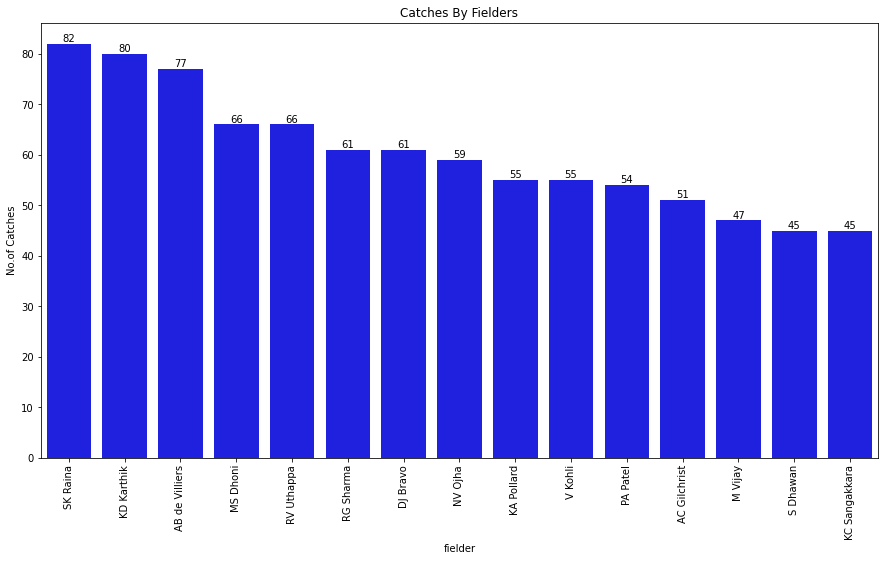

In [26]:
fielder_catch = df[["bowler", "Kind_Out", "Fielders"]]
fielder_catch.Fielders.fillna(fielder_catch.bowler, inplace=True)
fielder_catch = fielder_catch.groupby("Fielders")["Kind_Out"].agg(lambda x: (
    (x == "caught") | (x == "caught and bowled")).sum()).reset_index()
fielder_catch = fielder_catch.sort_values(
    by="Kind_Out", ascending=False).reset_index(drop=True)
fielder_catch.columns = ["fielder", "No.of Catches"]
fielder_catch_top = fielder_catch.iloc[:15, :]
plt.figure(figsize=(15, 8))
g = sns.barplot(x=fielder_catch_top['fielder'],
                y=fielder_catch_top['No.of Catches'],
                color='blue')
g.bar_label(container=g.containers[0])
plt.title('Catches By Fielders')
plt.xticks(rotation=90)
plt.show()